## What is a Neural Network?
An artificial neural network is a series of algorithms that endeavors to recognize underlying relationships in a set of data through a process that mimics the way the human brain operates. 
In this sense, neural networks refer to systems of neurons, either organic or artificial in nature. Neural networks can adapt to changing input; so the network generates the best possible 
result without needing to redesign the output criteria. In general, neural networks are useful to approximate non-linear, multi-dimensional functions. Or basically functions where we don't have any info about their functional form just inputs and outputs.
Early models resembled the biological neural networks (see the preceptron)

[Neural networks](https://en.wikipedia.org/wiki/Neural_network?useskin=vector) are usually arranged into layers, where information passing from layer to the next one firm the first one (input layer), to maybe some intermediate layers (the hidden layers), 
to the last one (the output layer). For each neuron, the input is a linear combination of the outputs of the previous layer connecting to it, and the neuron output is gien by the so-called 
activation function. The strenghst or weights of the network connections change dynamically so to approach optimally (given a minimization procedure) the data used during training usually following an algorithm like [back-propagation](https://en.wikipedia.org/wiki/Backpropagation?useskin=vector).  

<div style="text-align: center;">
    <img src="https://upload.wikimedia.org/wikipedia/commons/9/99/Neural_network_example.svg" alt="Image Description" width="600">
    <figcaption>From: "https://upload.wikimedia.org/wikipedia/commons/9/99/Neural_network_example.svg"</figcaption>
</div>

![Neural network with several layeres (Credit http://alexlenail.me/NN-SVG/index.html)](fig/nn.svg)

The input for each network is computed as 
$$
z = b + \sum_i w)i X_i,
$$
where $b$ is the bias, $w_i$ are the weights, and $X_i$ are the outputs of the neurons in the previous layer and connected t =o this one. Then , the output for this neuron is computed aas
$$
X = f(z),
$$ 
where $f$ is some [activation function](https://en.wikipedia.org/wiki/Activation_function?useskin=vector). Examples for [activations funtions](https://en.wikipedia.org/wiki/Activation_function?useskin=vector#Folding_activation_functions) are
- ReLu
- Tanh
- Sigmoid
- Linear
- ...

The evolution of the training process is measured in *epochs* (an iteration, basically). 



These are some recommended tools to get familiar with neural networks:
- A visual introduction: https://www.youtube.com/watch?v=UOvPeC8WOt8
- But what is a neural network? | Chapter 1, Deep learning: https://www.youtube.com/watch?v=aircAruvnKk
- Neural netoworks full playlist: https://www.youtube.com/watch?v=aircAruvnKk&list=PLZHQObOWTQDNU6R1_67000Dx_ZCJB-3pi
- Visualization of a fully connected neural network, version 1: https://www.youtube.com/watch?v=Tsvxx-GGlTg
- Watching Neural Networks Learn: https://www.youtube.com/watch?v=TkwXa7Cvfr8
- Neural network Visualization: http://alexlenail.me/NN-SVG/index.html

### Tensorflow playground
Now let's play a bit with a neural network: https://playground.tensorflow.org

![Neural network with several layeres (Credit http://alexlenail.me/NN-SVG/index.html)](fig/tensorflow-playground.png)

## Simple neural network: A perceptron
Based on https://www.youtube.com/watch?v=kft1AJ9WVDk

**TODO**
- Add bias
- Generalize to more hidden neurons


This is what we want to train our neural network with:

![Alt Text](fig/neuralnetwork/inputs.png)

And we want to predict the new output (try to guess the rule)

![Alt Text](fig/neuralnetwork/newoutput.png)

In [ ]:
!pip install -r requirements.txt

This is the neural network that we are going to use (you can also use http://alexlenail.me/NN-SVG/index.html)


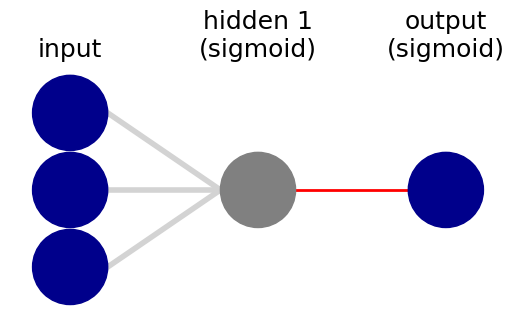

(<Figure size 640x480 with 1 Axes>, <Axes: >)

In [ ]:
from nnv import NNV

layersList = [
    {"title":"input", "units": 3, "color": "darkBlue"},
    {"title":"hidden 1\n(sigmoid)", "units": 1, "edges_color":"red", "edges_width":2},
    {"title":"output\n(sigmoid)", "units": 1,"color": "darkBlue"},
]

NNV(layersList).render()

To understand better the training, let's show explicitly the weights
![weightds](fig/neuralnetwork/weights.png)


Here $\phi$ is called the activation function, and there are several proposals to it. We will use a sigmoid function
$$
f(x) = \dfrac{1}{1+\exp(-x)},
$$
where $x = \sum x_i w_i$.

Text(0, 0.5, 'sigmoid(x)')

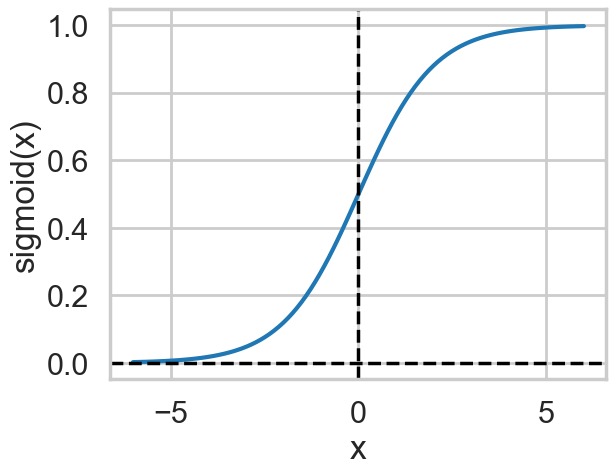

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
sns.set_context('poster')
sns.set_style("whitegrid")

def sigmoid(x) :
    return 1.0/(1 + np.exp(-x))

xdata = np.linspace(-6.0, 6.0, 100)
plt.plot(xdata, sigmoid(xdata))
# Highlight x=0 and y=0 axes
plt.axhline(0, color='black', linestyle='--', linewidth=2.5)  # Horizontal line at y=0
plt.axvline(0, color='black', linestyle='--', linewidth=2.5)  # Vertical line at x=0
# Add labels to the x-axis and y-axis
plt.xlabel("x")
plt.ylabel(rf"sigmoid(x)")


### Basic Implementation
For this very basic nn, we will:
- set the input or start of the algorithm:
    + Random weights $w_i$
    + Set the training inputs and outputs
- Create an iteration function to perform the training for `nsteps` (initially 1)

The we just iterate once and check what happens

In [ ]:
import numpy as np

def sigmoid(x) :
    return 1.0/(1 + np.exp(-x))

def get_training_inputs():
    return np.array([[0, 0, 1],
                     [1, 1, 1], 
                     [1, 0, 1],
                     [0, 1, 1]])

def get_training_outputs():
    return np.array([0, 1, 1, 0]).reshape(4, 1)

def get_init_weights():
    """
    Initially, simply return random weights in [-1, 1)
    """
    return np.random.uniform(-1.0, 1.0, size=(3, 1))

def training_one_step(training_inputs, training_outputs, initial_weights):
    # iter only once
    input_layer = training_inputs
    outputs = sigmoid(np.dot(input_layer, initial_weights))
    return outputs

In [ ]:
np.random.seed(1) # what happens if you comment this?
inputs_t = get_training_inputs()
outputs_t = get_training_outputs()
weights = get_init_weights()
print(inputs_t)
print(outputs_t)
print(weights)

[[0 0 1]
 [1 1 1]
 [1 0 1]
 [0 1 1]]
[[0]
 [1]
 [1]
 [0]]
[[-0.16595599]
 [ 0.44064899]
 [-0.99977125]]


In [ ]:
outputs = training_one_step(inputs_t, outputs_t, weights)
print("Training outputs:")
print(outputs_t)
print("Results after one step training:")
print(outputs)

Training outputs:
[[0]
 [1]
 [1]
 [0]]
Results after one step training:
[[0.2689864 ]
 [0.3262757 ]
 [0.23762817]
 [0.36375058]]


### Improving the training
These results are not optimal, and depend a lot on the initial weights. Also, we are not yet comparing with the expecting output for the training data. We are now going to include it and add correction terms to the weights, so we will be using back-propagation. Our algorithm is now:
- Take each input from the training data.
- Compute the error, i.e. the difference between the output and the expected one, `output - expectedoutput`. 
- According to the error, adjust the weights
- Repeat this many times, hopefully getting convergence , and also being able to apply our nn to new cases not used already.

But how to adjust the weights? There are several techniques based on the actual error $\Delta$. Here we will use error weighted derivative. Given the form of the sigmoid function, this increases the adjust if the derivative is larger, and viceversa. It can be expressed as 

$$
\Delta w = \Delta \times \text{input} \times \phi'(output),
$$
where $\phi'$ is the derivative of the activation function. In our one-dimensional case we can compute it easily, but with more complex problems it becomes a gradient and its efficient computation is very important (remember automatic differentiation?) 

In [ ]:
def sigmoid_prime(x):
    return sigmoid(x)*(1-sigmoid(x))

def train_nn(training_inputs, training_outputs, initial_weights, niter, errors_data):
    """
    training_inputs: asdasdasda
    ...
    errors_data: output - stores the errors per iteration
    """
    w = initial_weights
    for ii in range(niter):
        # Forward propagation
        input_layer = training_inputs
        outputs = sigmoid(np.dot(input_layer, w))
        # Backward propagation
        errors = training_outputs - outputs
        deltaw = errors*sigmoid_prime(outputs)
        deltaw = np.dot(input_layer.T, deltaw)
        w += deltaw
        # Save errors for plotting later
        errors_data[ii] = errors.reshape((4,))
    return outputs, w

In [ ]:
np.random.seed(1) # what happens if you comment this?
inputs_t = get_training_inputs()
outputs_t = get_training_outputs()
weights = get_init_weights()

In [ ]:
NITER = 50000
errors = np.zeros((NITER, 4))
outputs, weights = train_nn(inputs_t, outputs_t, weights, NITER, errors)
print("Training outputs:")
print(outputs_t)
print("Results after training:")
print(outputs)
print(weights)


Training outputs:
[[0]
 [1]
 [1]
 [0]]
Results after training:
[[1.44088654e-04]
 [9.99877867e-01]
 [9.99918587e-01]
 [9.60488041e-05]]
[[18.26087192]
 [-0.40562037]
 [-8.84495771]]


Text(0.5, 0, 'Epoch')

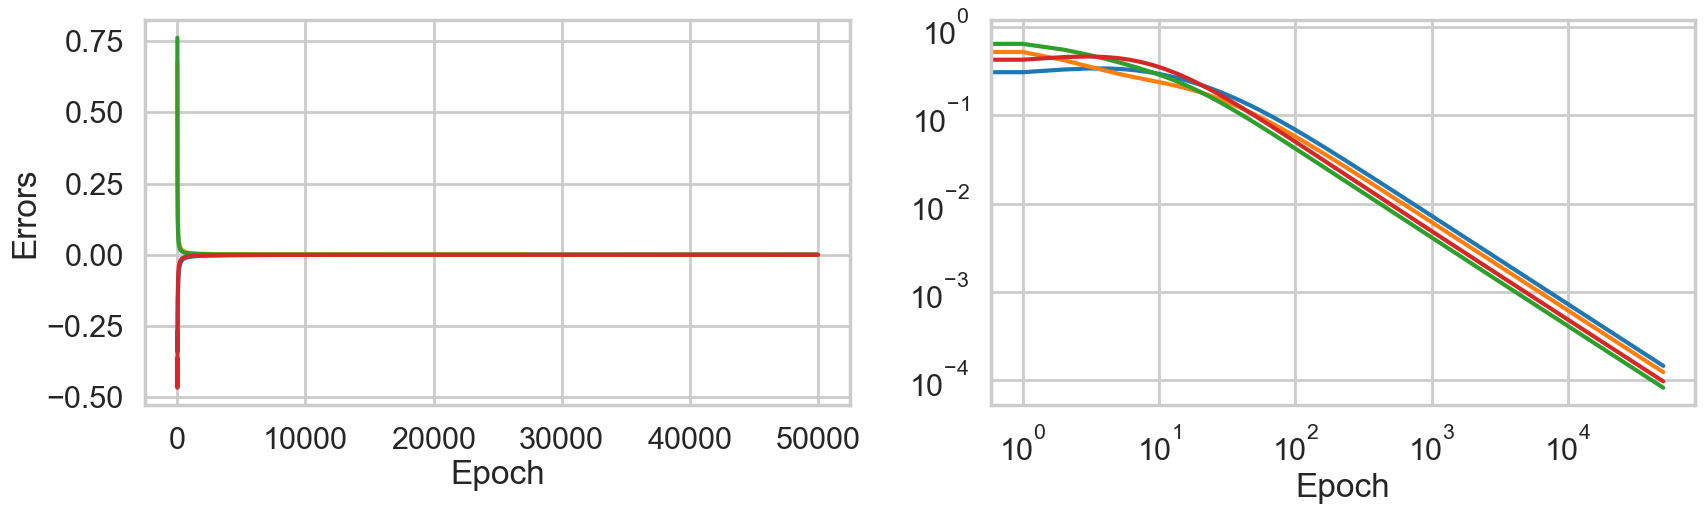

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(20, 5))
ax[0].plot(range(NITER), errors)
ax[0].set_xlabel("Epoch")
ax[0].set_ylabel("Errors")
ax[1].loglog(range(NITER), np.abs(errors))
ax[1].set_xlabel("Epoch")

It seems that our network is very well trained, But how does it perform with a new input? let's check with `[1, 0, 0]`


In [ ]:
#print(weights)
#print(weights.shape)
input_new = np.array([1, 0, 0]).reshape(3, 1)
#print(input_new)
#print(input_new.shape)
#print(np.sum(weights*input_new))
print(sigmoid(np.sum(weights*input_new)))

0.9999999882671348


Which is basically one, as expected.
There are more topics related to this that we have not used, like more layers, more neurons per hidden layer, bias on the activation function, and a lot of other details, but hopefully you now see how a neural network works on the core.

Recommended lectures:
- 3blue1brown Neural Networks: https://www.youtube.com/watch?v=aircAruvnKk&list=PLZHQObOWTQDNU6R1_67000Dx_ZCJB-3pi
- Neural networks from scratch: https://www.youtube.com/watch?v=9RN2Wr8xvro
- Backprop basic: https://www.youtube.com/watch?v=wqPt3qjB6uA
- https://www.youtube.com/watch?v=khUVIZ3MON8&t=0s

TODO:
- Plot the weights as a function of the epoch.
- Remove one data from training and check if the prediction is ok. Remove more.
- Add a second layer and compare the convergence
- Add an example using pythorch/tensorflow